In [5]:
# pickle_name = "crosstabs-pickle-conv_ai_3.p"
# crosstabs = [pickle.load(open(pickle_name, "rb"))]

In [6]:
import re
import pandas as pd
import analysis_relabel_funcs
from analysis import read_dfs
import torch
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency
from torch.nn import Softmax
import seaborn as sns
import matplotlib.pyplot as plt
from functools import partial
import pickle
import swifter
import time
%matplotlib inline

In [21]:
def scale_and_generate(ct, dataset_name):
    toxic_model_name = ct["toxic_model_name"]
    gender_model_name = ct["gender_model_name"]
    toxic_score_col, toxic_category_col = ct["toxic_attr"]
    gender_score_col, gender_category_col = ct["gender_attr"]
    std_scaler = StandardScaler()
    df = ct["df"]
    print(df.describe())
    # covariance 
    scores_df = df[[toxic_score_col, gender_score_col]]
    try:
        scores_df = pd.DataFrame(std_scaler.fit_transform(scores_df), columns=scores_df.columns)
    except Exception as e:
        print(df)
        print(f"FAILED TO GENERATE COVARIANCE FOR {dataset_name} WITH MODELS TOXIC: {toxic_model_name} GENDER: {gender_model_name}")
        return 
    cov = scores_df.cov()
    print(f"{dataset_name} | {toxic_category_col} | {gender_category_col}")
    print(cov)
    
    # contingency 
    contingency = pd.crosstab(df[toxic_category_col], df[gender_category_col])
    c, p, dof, expected = chi2_contingency(contingency)
    print(f"p-value is {p}")
    
    f, ax = plt.subplots(figsize=(9, 6))
    sns.heatmap(contingency, annot=True, fmt="d", cmap="YlGnBu").set_title(dataset_name)
    
    print("------------------------------")

In [14]:
for eval_dataset_name, ct_list in crosstabs: 
    for ct in ct_list:
        scale_and_generate(ct, eval_dataset_name)

['./crosstabs-pickle-yahoo_answers_topics.p', './crosstabs-pickle-tweet_eval.p', './crosstabs-pickle-ted_talks_iwslt.p', './crosstabs-pickle-pubmed_qa.p', './crosstabs-pickle-wikipedia.p', './crosstabs-pickle-conv_ai_3.p']
loading ./crosstabs-pickle-wikipedia.p
       scores_BERT-SBIC-offensive  scores_BERT-rtgender-opgender-annotations
count               176349.000000                              176349.000000
mean                    -0.972712                                  -0.093155
std                      0.162241                                   0.795284
min                     -0.999369                                  -0.995859
25%                     -0.998373                                  -0.914386
50%                     -0.996941                                  -0.332512
75%                     -0.993378                                   0.888056
max                      0.998715                                   0.993733
wikipedia | category_BERT-SBIC-offensive | ca

------------------------------
loading ./crosstabs-pickle-conv_ai_3.p
       scores_BERT-Jigsaw  scores_BERT-mdgender-convai-ternary
count        90803.000000                         90803.000000
mean            -0.999735                             0.929085
std              0.012278                             0.289590
min             -0.999955                            -0.999880
25%             -0.999941                             0.994219
50%             -0.999941                             0.994219
75%             -0.999941                             0.994219
max              0.854163                             0.999921
conv_ai_3 | category_BERT-Jigsaw | category_BERT-mdgender-convai-ternary
                                     scores_BERT-Jigsaw  \
scores_BERT-Jigsaw                             1.000011   
scores_BERT-mdgender-convai-ternary           -0.026192   

                                     scores_BERT-mdgender-convai-ternary  
scores_BERT-Jigsaw                   

       scores_BERT-SBIC-offensive  scores_BERT-mdgender-wizard
count                90803.000000                 90803.000000
mean                    -0.992176                     0.885348
std                      0.065530                     0.250299
min                     -0.999366                    -0.999727
25%                     -0.994871                     0.917814
50%                     -0.994871                     0.917814
75%                     -0.994871                     0.917814
max                      0.998628                     0.999731
conv_ai_3 | category_BERT-SBIC-offensive | category_BERT-mdgender-wizard
                             scores_BERT-SBIC-offensive  \
scores_BERT-SBIC-offensive                     1.000011   
scores_BERT-mdgender-wizard                   -0.060287   

                             scores_BERT-mdgender-wizard  
scores_BERT-SBIC-offensive                     -0.060287  
scores_BERT-mdgender-wizard                     1.000011  
p-val

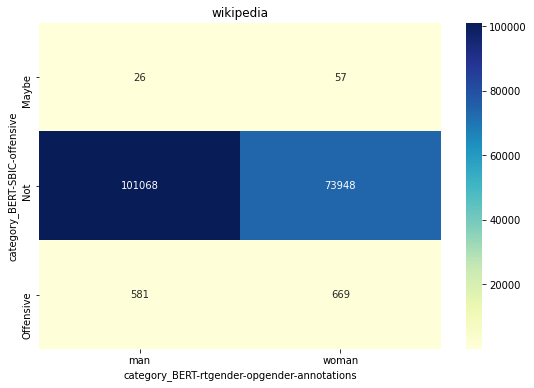

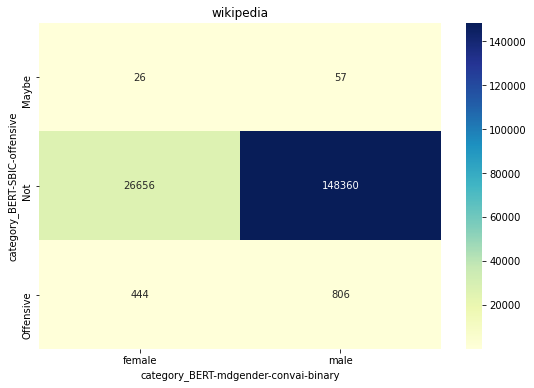

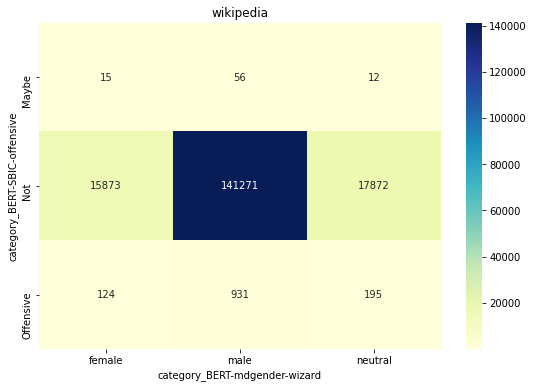

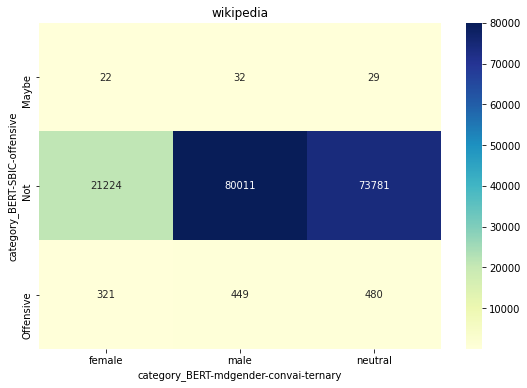

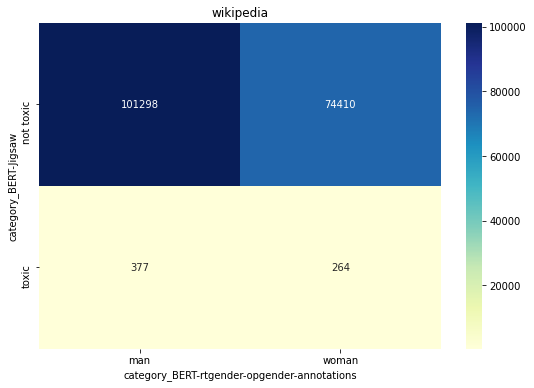

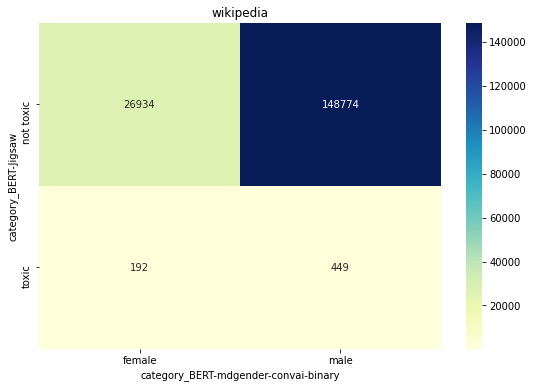

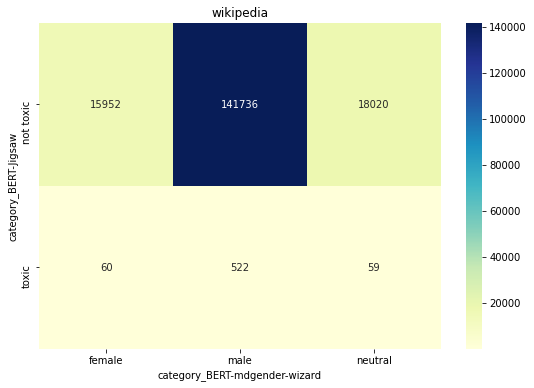

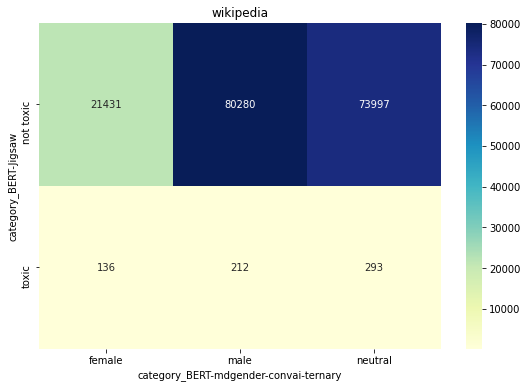

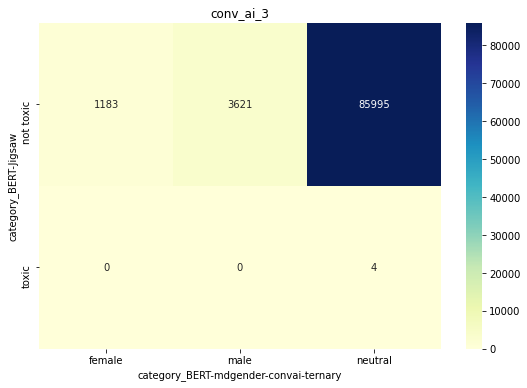

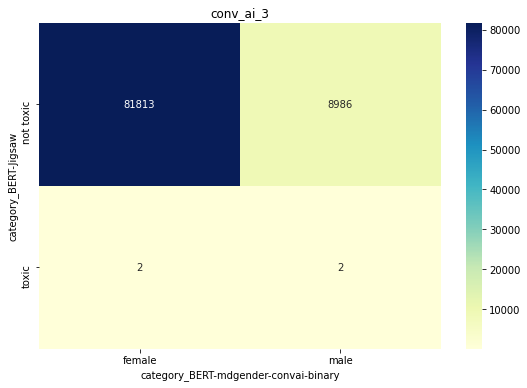

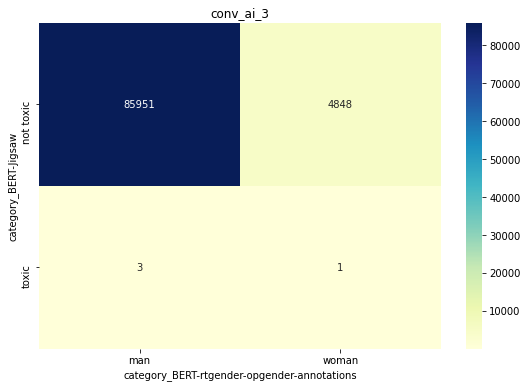

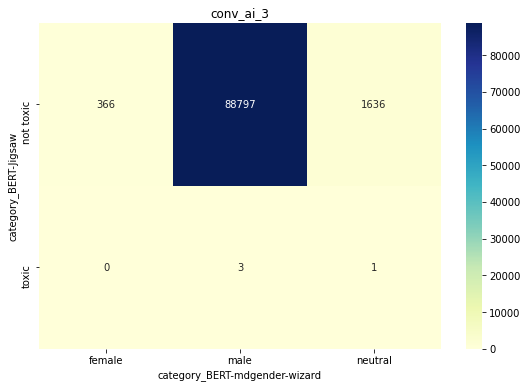

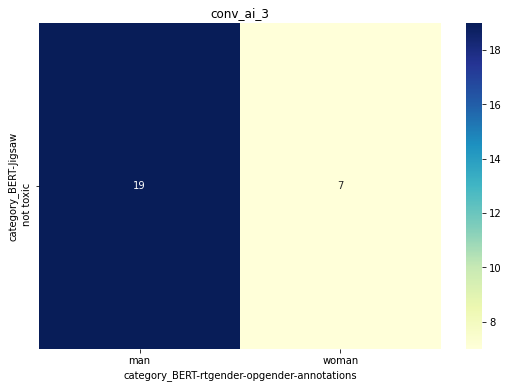

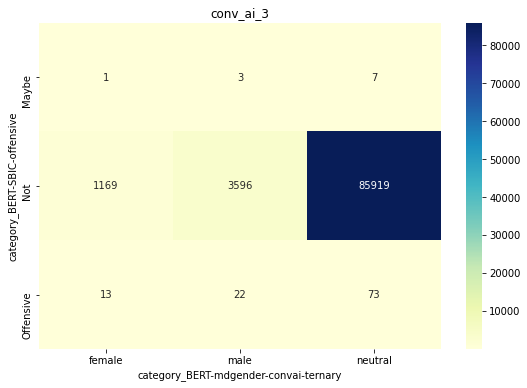

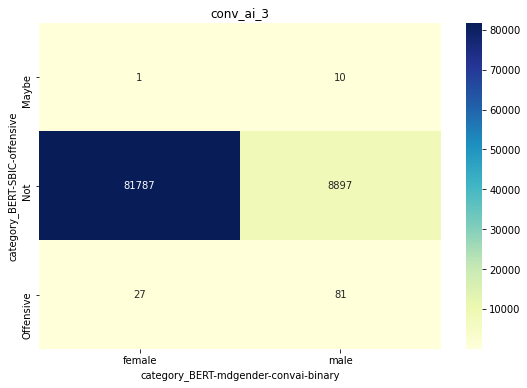

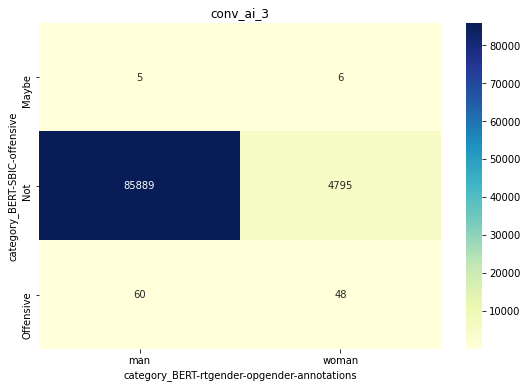

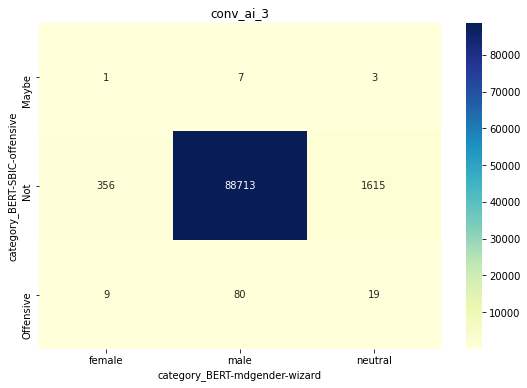

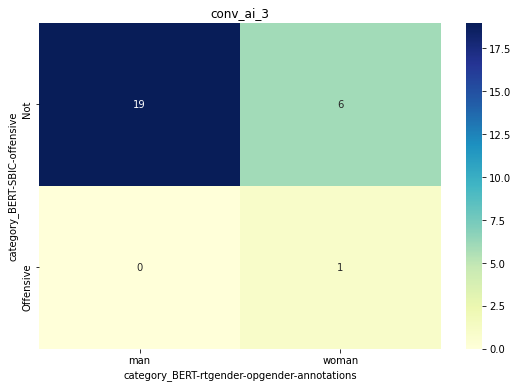

In [22]:
# uncomment below to use all globs
from glob import glob
pickles = glob("./crosstabs-pickle-*")
print(pickles)
for p in pickles:
    if p not in {'./crosstabs-pickle-wikipedia.p', './crosstabs-pickle-conv_ai_3.p'}:
        continue
    print(f"loading {p}")
    crosstabs = [pickle.load(open(p, "rb"))]
    for eval_dataset_name, ct_list in crosstabs: 
        for ct in ct_list:
            scale_and_generate(ct, eval_dataset_name)